In [2]:
import sqlite3

# Connect to (or create) the database
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Create a simple sales table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Insert sample data
sample_data = [
    ("Apple", 10, 2.5),
    ("Banana", 20, 1.0),
    ("Apple", 5, 2.5),
    ("Orange", 15, 1.8),
    ("Banana", 10, 1.0)
]
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()
conn.close()

In [3]:
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect("sales_data.db")

# SQL query to get total quantity and revenue per product
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""

# Load query result into a pandas DataFrame
df = pd.read_sql_query(query, conn)
conn.close()

In [4]:
print("Sales Summary:")
print(df)

Sales Summary:
  product  total_qty  revenue
0   Apple         30     75.0
1  Banana         60     60.0
2  Orange         30     54.0


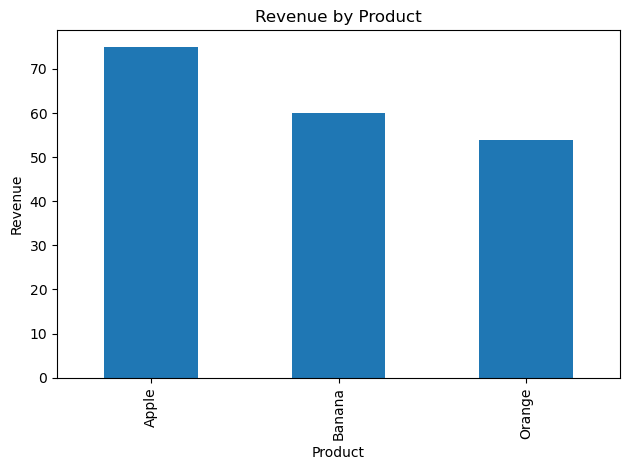

<Figure size 640x480 with 0 Axes>

In [5]:
import matplotlib.pyplot as plt

# Plot revenue by product
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue")
plt.xlabel("Product")
plt.tight_layout()
plt.show()

# Optional: Save the chart
plt.savefig("sales_chart.png")